# Optimizer

In [1]:
%reset -f

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import torch

## Principe

On ne fera plus la descende de gradient à la main. On utilisera des optimiseur qui vont soustraire les gradients aux variables entrainables.

En fait l'optimiseur le plus utilisé est `Adam`. Il ne fait pas que soustraire les gradients aux variables, mais il effectue un scaling adaptatif des gradients. On verra ceci en détail dans un autre TP.

### Optimiser une  variable

In [3]:
x=torch.tensor(10.,requires_grad=True)
opt=torch.optim.Adam([x],lr=1.) #on précise sur quelle(s) variable(s) l'optimiseur doit travailler.

for _ in range(10):
    y=x**2
    y.backward()
    opt.step()
    opt.zero_grad()
    print(f"x:{x}")

### Optimiser deux variables

In [4]:
x=torch.tensor(10.,requires_grad=True)
y=torch.tensor(10.,requires_grad=True)
opt=torch.optim.Adam([x,y],lr=1.)

for _ in range(10):
    loss=torch.abs(x+y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    print(f"loss:{loss}-> x:{x},y:{y}")

#### ♡♡♡

***A vous:*** Expliquez pourquoi `x` et `y` descendent exactement de 1 à chaque itération. Si on fait plus d'itérations, est-ce que ça va permettre d'atteindre le minimum global de la loss ? Et si on baisse le learning rate ?


Si vous répondez bien, vous devreiez comprendre pourquoi, de manière générale, on  préfère les `mse` aux `mae`.

### Idem, mais avec un tenseur plus gros

In [5]:
xy=torch.tensor([10.,10.],requires_grad=True)
opt=torch.optim.Adam([xy],lr=1.)

for _ in range(10):
    loss=torch.abs(torch.sum(xy))
    loss.backward()
    opt.step()
    opt.zero_grad()
    print(f"loss:{loss}-> x:{xy[0]},y:{xy[1]}")

## Détacher

Une petite aparté:

Quand on veut faire des plot on tombe souvent sur ce bug:




###Le bug

In [6]:
x=torch.tensor(3.,requires_grad=True)
y=torch.tensor(5.,requires_grad=True)
z=x+y
try:
    plt.scatter(x,z)
except Exception as e:
    print(e)

Puisque `x`, `y`, `z` vérifient `requires_grad=True`, elles sont **attachées** à un graph de calcul.


 Le message d'erreur indique qu'avant d'utiliser le contenu des variables, `plt.scatter` les convertit automatiquement  en numpy. Mais cette convertion ne peut pas se faire avec des variables attachées.


De même quand un tenseur est sur le gpu, il faut le rappatrié sur le cpu avec la méthode `cpu()` avant de pouvoir le transformer en numpy(). Vous verrez donc souvent dans les programme torch la suite de méthode:


    x.detach().cpu().numpy()

(bien que la dernière méthode est souvent facultative, car lancée automatiquement par les autres lib).





### Optimiser une variable sur deux

In [7]:
x=torch.tensor(10.,requires_grad=True)
y=torch.tensor(10.,requires_grad=True)
opt=torch.optim.Adam([x,y],lr=1.)

for _ in range(10):
    x_=x.detach()
    loss=torch.abs(x_ + y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    print(f"x:{x},x':{x_},y:{y},loss:{loss}")

La variable `x_` n'est pas attachée au graph des calcul. Elle n'influe pas sur le calcul de la `loss`. Elle n'est donc pas bouger par l'optimizer.

### La copie suit

Attention va méthode `.detach()`  crée une copie de surface  en retirant toutes les informations relative au graph. Mais les `data` sont partagées entre `x` et `x.detach()` comme on le voit dans le programme ci-dessous.


In [8]:
x=torch.tensor(10.,requires_grad=True)
y=torch.tensor(10.,requires_grad=True)
opt=torch.optim.Adam([x,y],lr=1.)

for _ in range(10):
    x_=x.detach()
    loss=torch.abs(x + y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    print(f"x:{x},x':{x_},y:{y},loss:{loss}")

Attention,
* la méthode `x.numpy()` tout comme `x.detach()` ne copie pas `x.data`
*  la méthode `.clone()`  par contre fait une copie profonde.
* la méthode `.item()`, pour les tenseurs scalaire uniquement, fait forcément une copie profonde puisque qu'elle renvoit un float/int en pure-python
* la méthode `.cpu()` ... a vous de voir.  

## Regression

Bien sur, on utilisera les optimiseurs sur l'ensemble des variables d'un modèle. Ainsi la syntaxe sera:


    opt=torch.optim.Adam(model.parameters(),lr=1e-4)


### Data

In [9]:
def make_data(nb):
    X=torch.rand(nb)*2
    Y=torch.exp(-X)*torch.sin((5*X))+torch.randn(nb)*0.005
    return X,Y

In [10]:
X_train,Y_train=make_data(10000)
X_train.shape,Y_train.shape

In [11]:
plt.plot(X_train,Y_train,".");

### modèle

In [12]:
class Model_1d_to_1d(torch.nn.Module):
    def __init__(self,hidden_dim=20):
        super().__init__()
        self.lay1=torch.nn.Linear(1,hidden_dim)
        self.lay2=torch.nn.Linear(hidden_dim,hidden_dim)
        self.lay3=torch.nn.Linear(hidden_dim,hidden_dim)
        self.final_layer=torch.nn.Linear(hidden_dim,1)


    def forward(self, x):
        x=torch.tanh(self.lay1(x))
        x=torch.tanh(self.lay2(x))
        x=torch.tanh(self.lay3(x))
        return self.final_layer(x)


model = Model_1d_to_1d()
model(X_train[:13,None]).shape

Rémarque: si vous voulez travailler avec un gpu il faudra faire:

    X_train=X_train.to("cuda")
    Y_train=Y_train.to("cuda")
    model=model.to("cuda")

### Train

In [13]:
optimizer = torch.optim.Adam(model.parameters(),lr=1e-2);
losses=[]
batch_size=126
nb_steps=300

#### ♡♡

In [14]:
for _ in range(nb_steps):
    indices=np.random.randint(0,len(X_train),size=batch_size)
    x=X_train[indices,None]
    y=Y_train[indices,None]
    y_pred =
    loss =

    # Backpropagation
    loss.
    optimizer.
    optimizer.

    losses.append(loss.item())

In [15]:
fig,ax=plt.subplots()
ax.set_yscale("log")
ax.plot(losses);

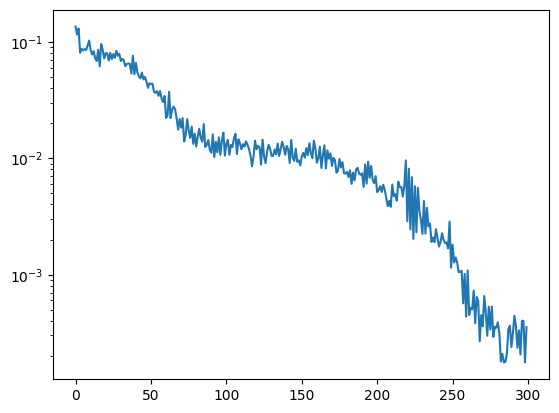

In [15]:
#--- To keep following outputs, do not run this cell! ---

### test

In [16]:
X_test=torch.linspace(0,2,500)
Y_test=model(X_test[:,None])[:,0].detach()
plt.plot(X_train,Y_train,".")
plt.plot(X_test,Y_test);

#### ♡♡

***A vous:*** Comment obtient-on le plot ci-dessous?

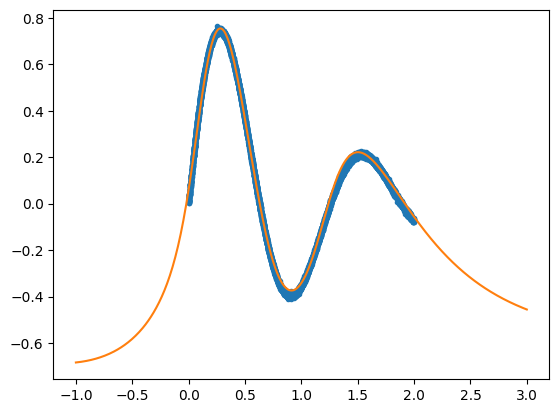

In [17]:
#--- To keep following outputs, do not run this cell! ---

#### ♡♡


Refaites tourner tout ceci en remplaçant la fonction d'activation `torch.arctan` par `torch.relu`. Analysez le plot obtenu.

In [22]:
class Model_1d_to_1d_relu(torch.nn.Module):
    def __init__(self,hidden_dim=20):
        super().__init__()
        self.lay1=torch.nn.Linear(1,hidden_dim)
        self.lay2=torch.nn.Linear(hidden_dim,hidden_dim)
        self.lay3=torch.nn.Linear(hidden_dim,hidden_dim)
        self.final_layer=torch.nn.Linear(hidden_dim,1)


    def forward(self, x):
        x=torch.relu(self.lay1(x))
        x=torch.relu(self.lay2(x))
        x=torch.relu(self.lay3(x))
        return self.final_layer(x)

model = Model_1d_to_1d_relu()

optimizer = torch.optim.Adam(model.parameters(),lr=1e-2);
losses=[]
batch_size=126
nb_steps=300

for _ in range(nb_steps):
    indices=np.random.randint(0,len(X_train),size=batch_size)
    x=X_train[indices,None]
    y=Y_train[indices,None]
    y_pred = model(x)
    loss = torch.mean((y_pred-y)**2)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    losses.append(loss.item())

fig,ax=plt.subplots()
ax.set_yscale("log")
ax.plot(losses);


In [23]:
X_test=torch.linspace(0,2,500)
Y_test=model(X_test[:,None])[:,0].detach()
plt.plot(X_train,Y_train,".")
plt.plot(X_test,Y_test);

### Un bug silencieux

Attention, les modèles que l'on crée prennent en entrée des matrices et resortent des matrices. Quand on travail avec des vecteur il y a donc des conversions à faire. C'est pour cela qu'apparaissent les crochets `[:,None]` puis `[:,0]`dans les codes.


Une erreur ultraclassique est d'avoir des données comme ceci:

    X_train.shape=(batch_size,)
    Y_train.shape=(batch_size,)

Puis de calculer une loss ainsi:

    Y_pred=model(X_train[:,None])
    loss=torch.mean((Y_pred - Y_train)**2)

Comme on fait une opération entre tenseur de dimensions différente, il y aura un `new-axis` ajouté automatiquement. Le calcul qui sera fait sera donc:

    
    loss=torch.mean((Y_pred         -  Y_train[None,:])**2)
    #                (batch_size,1) -  (1,batch_size)

On fait  la différence entre une matrice ligne et une matrice colonne:  ainsi toutes les données sont mélangées, la loss n'a aucun sens. Cela crée un bug 'silencieux' (pas de message d'erreur).

J'ai perdu beaucoup de temps sur ce bug; vous, vous n'en perdrez pas 😉.





# Classification

## Data

On télécharge les data via le site de tensorflow, qui nous donne des tenseurs numpy. Plus pratique que le site de torch qui donne les données sous des formats plus complexe (pour moi).

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images.shape,type(train_images)

In [ ]:
fig,axs=plt.subplots(5,5,figsize=(10,10),sharex="all",sharey="all")
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(train_images[i*5+j,:,:])
        axs[i,j].set_title(f"classe:{train_labels[i*5+j]}")
fig.tight_layout()

Voici la signification des classes:

    0	T-shirt/haut
    1	Pantalon
    2	Pullover (dans un tuto français=> "Arrêtez-vous" :-)
    3	Robe
    4	Manteau
    5	Sandale
    6	Chemise
    7	Basket
    8	Sac
    9	Bottine

On va traiter chaque image comme un simple vecteur de taille 784. On ignore la structure bi-dimensionnel.

Il faut penser à renormaliser les données pour qu'elles ne soient pas trop grandes. Les réseaux de neuronnent peuvent assez facilement recrcher en sortie des grandes valeurs, mais elles n'aiment pas manger en entrées de grandes valeurs => Centrer-réduire, ou faire un min-max scaling (=  ramener des data dans [0,1])

In [ ]:
X_train=np.reshape(train_images/255,[-1,28*28])
X_test=np.reshape(test_images/255,[-1,28*28])

Y_train=train_labels
Y_test=test_labels

In [ ]:
X_train.shape,X_test.shape

## Train

On prend les même hyper-paramètre pour les entrainements tf et torch

In [ ]:
batch_size=128
learning_rate=1e-3
hidden_dim=20
nb_steps=1_000

In [ ]:
X_train_torch=torch.tensor(X_train,dtype=torch.float32)
X_test_torch=torch.tensor(X_test,dtype=torch.float32)

Y_train_torch=torch.tensor(Y_train,dtype=torch.int64)
Y_test_torch=torch.tensor(Y_test,dtype=torch.int64)

In [ ]:
class Model_classif(torch.nn.Module):
    def __init__(self,hidden_dim):
        super().__init__()
        self.lay1=torch.nn.Linear(784,hidden_dim)
        self.lay2=torch.nn.Linear(hidden_dim,hidden_dim)
        self.lay3=torch.nn.Linear(hidden_dim,hidden_dim)
        self.final_layer=torch.nn.Linear(hidden_dim,10)

    def forward(self, x):
        x=torch.relu(self.lay1(x))
        x=torch.relu(self.lay2(x))
        x=torch.relu(self.lay3(x))
        return self.final_layer(x)

In [ ]:
def train_step_torch(x,y,model,optimizer,loss_fn):
    pred = model(x)
    loss = loss_fn(pred,y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    return loss.item()

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
model = Model_classif(hidden_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
losses=[]

In [ ]:
%%time
for _ in range(nb_steps):
    indices=np.random.randint(0,len(X_train),size=batch_size)
    x=X_train_torch[indices,:]
    y=Y_train_torch[indices]

    loss=train_step_torch(x,y,model,optimizer,loss_fn)
    losses.append(loss)


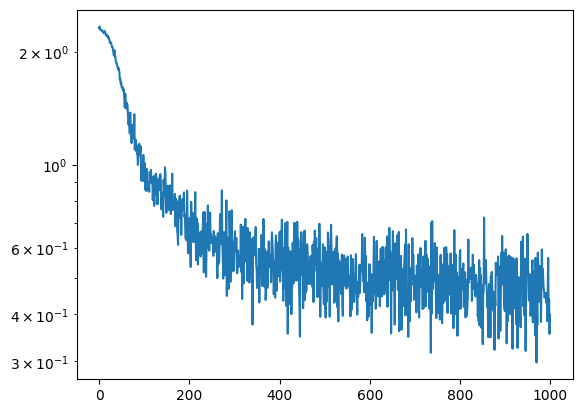

In [ ]:
#--- To keep following outputs, do not run this cell! ---

In [ ]:
Y_test_pred_logits=model(X_test_torch).detach().cpu().numpy()
Y_test_pred=np.argmax(Y_test_pred_logits,axis=1)
Y_test_pred

Calculons l'accuracy:

In [ ]:
np.mean(Y_test_pred==Y_test)

#### ♡♡

Faites durer l'entrainement plus longtemps pour voir si cela améliore l'accuracy.